## GemPy Models - Some Examples

In [1]:
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano

### Choose a model and load the corresponding data set in the line below

Model 1: Discordant layering

Model 2: Anticlinal layering

Model 3: Parallel steep dipping layers

Model 5: Normal faulting

Model 6: Synclinal layering

Model 7: Graben structure with two faults

Model 8: Similar to Model 5

Model 9: Parallel flat dipping layers

In [19]:
os.path.abspath("../../data/input_data/lisa_models/")

'/Users/varga/PycharmProjects/gempy/notebooks/data/input_data/lisa_models'

In [34]:
def create_example(name_model, interpolator=None, save_pickle=True, plot_section=True):
    """
    Create an inter_data from one of the examples data_set
    
    Attr:
        name_model (str): name of the model that you want to generate. It has to be in ['Model 1' ,'Model 2', 'Model 3', 'Model 4','Model 5' 'Model 6','Model 7',
                          'Model 8', 'Model 9']
        save_pickle (bool, str): Save to a pickle the interp_data object. You can pass the path as a string otherwse
                                the default name will be given
        plot_section (bool)
    
    """
    name_list = np.array(['Model 1' ,'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6','Model 7',
                          'Model 8', 'Model 9'])
    assert name_model in name_list, 'Name model must be in the following list: ' + str(name_list) 
    # Extract number of the model
    n_model = name_model[-1]
    
    # Load right gempy geodata
    geo_data = gp.create_data([0,2000,0,2000,0,1600], [50,50,50],
                  path_o = os.path.abspath("../../data/input_data/lisa_models/foliations"+n_model+".csv"),
                  path_i = os.path.abspath("../../data/input_data/lisa_models/interfaces"+n_model+".csv"))
                    
    # Set the right sequential pile
    subset_list_1 = np.array(['Model 1'])
    subset_list_2 = np.array(['Model 5', 'Model 8'])
    subset_list_3 = np.array(['Model 2', 'Model 3', 'Model 9', 'Model 6'])
    subset_list_4 = np.array(['Model 7'])
    ### Model 1 - Discordant layering ###
    if name_model in subset_list_1:
        gp.map_series_to_surfaces(geo_data, {"Strat_Series_1":('Sandstone','Siltstone','Shale'),
                                 "Strat_Series_2":('Sandstone2','Siltstone2','Shale2')},
                )
    ### Model 5 - One normal Fault ###
    ### Model 8 - ###
    elif name_model in subset_list_2:
        gp.map_series_to_surfaces(geo_data, {"Fault_Series":'Main_Fault',
                             "Strat_Series": ('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
               )
        geo_data.set_is_fault(['Fault_Series'])
    elif name_model in subset_list_3:
        ### Model 2 - Aufwölbung (durch Salzstock?) ###
        ### Model 3+9 - Parallele NNE Schichtung ohne Verwerfung ###
        ### Model 6 - Mulde ###
        gp.map_series_to_surfaces(geo_data, {"Strat_Series":('Sandstone','Siltstone','Shale','Sandstone_2', 'Schist', 'Gneiss')},
               )
    
    elif name_model in subset_list_4:
        ### Model 7 - Graben ###
        gp.map_series_to_surfaces(geo_data, {"Fault_1":'Fault_1',"Fault_2":'Fault_2',
                                 "Strat_Series":('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
                    )
        geo_data.set_is_fault(['Fault_1', 'Fault_2'])

    else:
        print('You would never reach this point. Look for the bug')
        
   
    
    # Interpolation and Computation
    if interpolator is None:
        interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_run')
    else:
        interp_data = interpolator
        geo_data.set_theano_function(interpolator)
    sol = gp.compute_model(geo_data)
    #ver , sim = gp.get_surfaces(interp_data, lith_block[1], fault_block[1])
    
    if plot_section is True:
        # 2D Plot
        gp.plot.plot_section(geo_data, cell_number=25,
                         direction='y', show_data=True)
    
    if save_pickle is not False:
        if type(save_pickle) is str:
            gp.save_model_to_pickle(geo_data, save_pickle)
        else:
            gp.save_model_to_pickle(geo_data, 'lisa-'+str(n_model))
    
    return interp_data        

In [35]:
def generate_all_models(list_of_models):
    
    for e, n in enumerate(list_of_models):
        if e ==0:
            interp = create_example(n, None, save_pickle=False, plot_section=True)
        else:
            create_example(n, interp, save_pickle=False, plot_section=True)

Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Compilation Done!


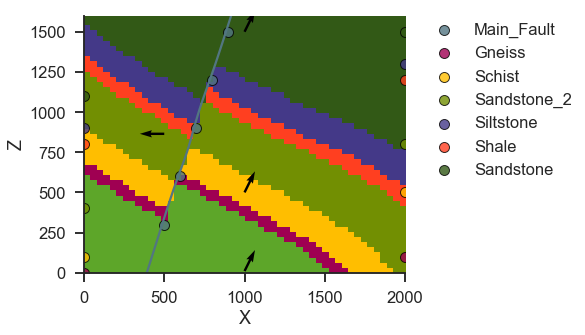

In [22]:
create_example('Model 5')

Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Compiling theano function...
Compilation Done!
Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Fault colors changed. If you do not like this behavior, set change_color to False.
Active grids: ['regular']


../../../gempy/core/data.py:1604: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


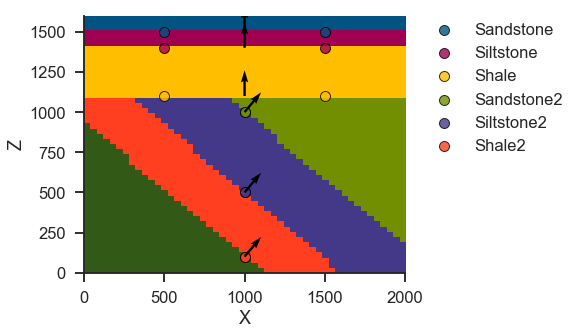

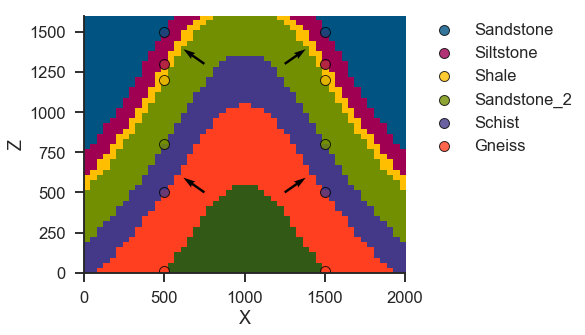

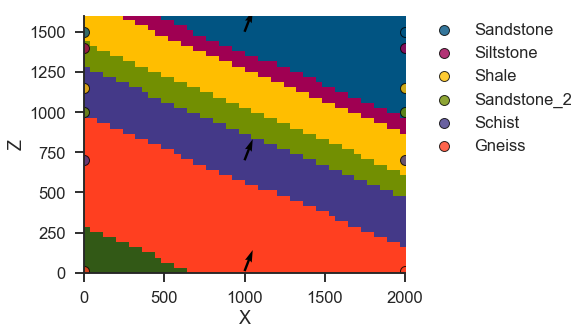

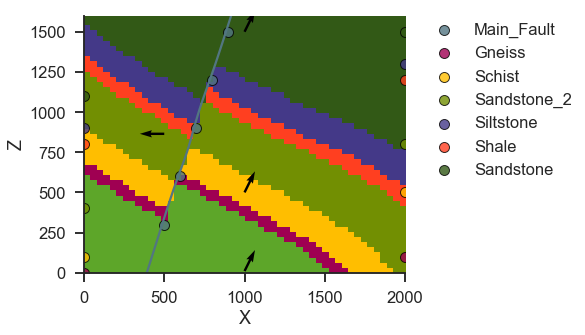

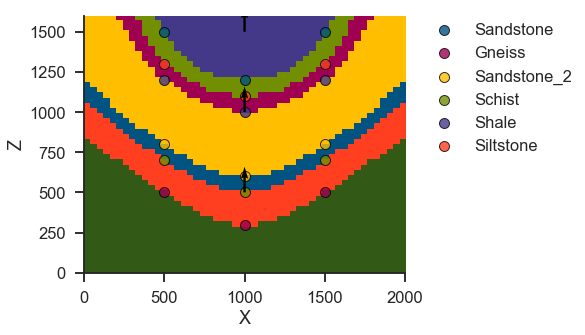

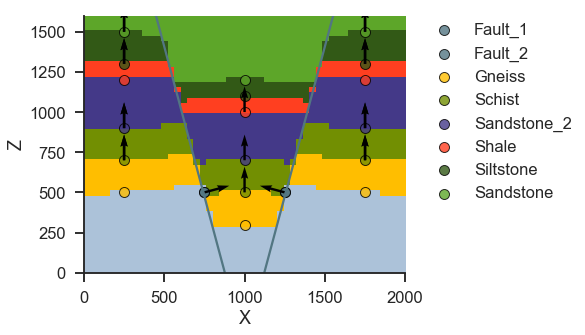

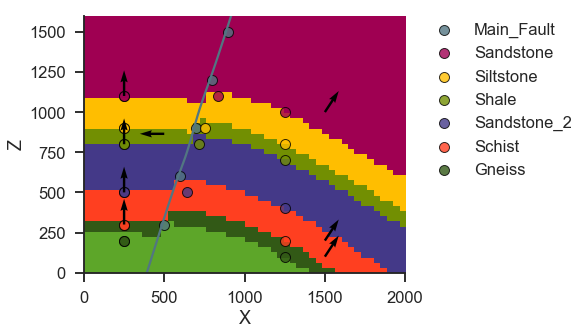

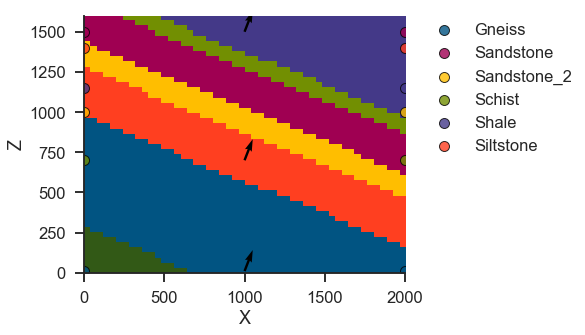

In [36]:
generate_all_models(['Model 1' ,'Model 2', 'Model 3', 
                     'Model 5', 'Model 6','Model 7',
                     'Model 8', 'Model 9'])